# 타이타닉 데이터 분석 및 시각화

---

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns

In [70]:
sns.set_style('whitegrid')

In [71]:
titanic = sns.load_dataset('titanic') #seaborn에 있는 타이타닉 데이터 불러오기

In [72]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [73]:
titanic.describe() #타이타닉 데이터 요약

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
titanic.dropna().describe() #nan값 삭제후 데이터 요약

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [75]:
titanic.var() #분산

survived         0.236772
pclass           0.699015
age            211.019125
sibsp            1.216043
parch            0.649728
fare          2469.436846
adult_male       0.239723
alone            0.239723
dtype: float64

In [76]:
titanic.mad() #median absoulte deviation 중앙값 절대 편차

survived       0.473013
pclass         0.761968
age           11.322944
sibsp          0.713780
parch          0.580742
fare          28.163692
adult_male     0.478908
alone          0.478908
dtype: float64

In [77]:
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


<AxesSubplot:xlabel='count', ylabel='class'>

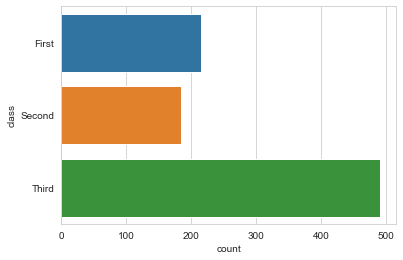

In [78]:
sns.countplot(y='class', data=titanic)

<AxesSubplot:xlabel='count', ylabel='sex'>

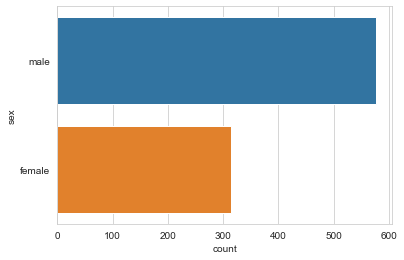

In [79]:
sns.countplot(y='sex', data=titanic)

<AxesSubplot:xlabel='count', ylabel='alive'>

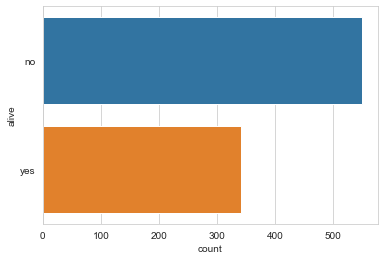

In [80]:
sns.countplot(y='alive', data=titanic)

<AxesSubplot:xlabel='count', ylabel='alone'>

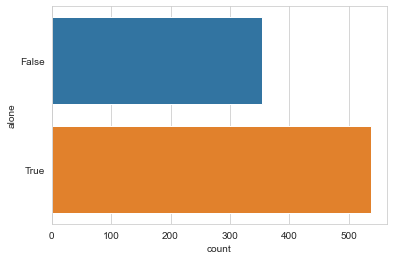

In [81]:
sns.countplot(y='alone', data=titanic)

In [82]:
titanic.groupby('class').std() #class별 표준편차

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,0.498555,0.501140
Second,0.500623,0.0,14.001077,0.601633,0.690963,13.417399,0.499911,0.497081
Third,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,0.477552,0.474233


In [83]:
titanic.groupby('class')['fare'].median() #class별 운임비용의 중앙값

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

In [84]:
titanic.query("alive == 'yes'") #alive한 사람

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [85]:
titanic.query("alive == 'yes'").groupby('class').count() #class별 산 사람 수

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


In [86]:
titanic.groupby('class')['age'].describe() #class별 나이 요약통계량

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
Second,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
Third,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [87]:
titanic.query("alive == 'yes'").groupby('class')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,122.0,35.368197,13.760017,0.92,24.25,35.0,45.0,80.0
Second,83.0,25.901566,14.837787,0.67,17.50,28.0,34.0,62.0
Third,85.0,20.646118,11.995047,0.42,14.00,22.0,29.0,63.0


In [88]:
titanic.groupby('sex')['age'].aggregate([min, np.median, max])

,min,median,max
sex,,,
female,0.75,27.0,63.0
male,0.42,29.0,80.0


In [89]:
titanic.query("age > 30").groupby('class').median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,1,1,45.0,0,0,56.9292,True,False
Second,0,2,39.0,0,0,14.0000,True,True
Third,0,3,38.0,0,0,8.0500,True,True


In [90]:
titanic.query("fare < 20").groupby('class').median() #class별 운임비용이 20미만인 중앙값

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0,1,38.5,0,0,0.0000,True,True
Second,0,2,30.0,0,0,13.0000,True,True
Third,0,3,25.0,0,0,7.8958,True,True


In [91]:
titanic.groupby(['class', 'sex'])['age'].mean().unstack()

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


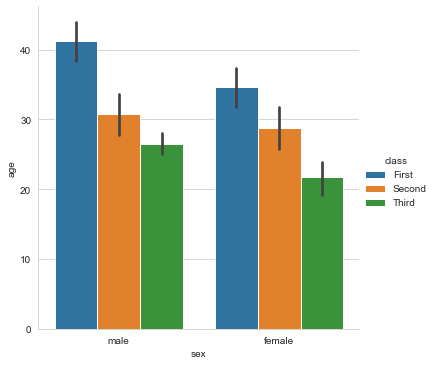

In [92]:
sns.catplot(x='sex', y='age', hue='class', kind='bar', data=titanic);

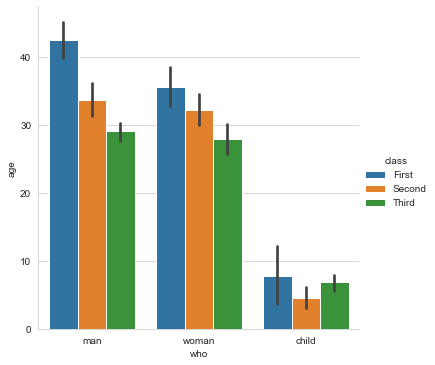

In [93]:
sns.catplot(x='who', y='age', hue='class', kind='bar', data=titanic);

In [94]:
titanic.groupby(['class', 'sex'])['fare'].mean().unstack()

sex,female,male
class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


In [95]:
titanic.groupby(['class', 'who'])['fare'].mean().unstack()

who,child,man,woman
class,,,
First,139.382633,65.951086,104.317995
Second,28.323905,19.054124,20.868624
Third,23.220190,11.340213,15.354351


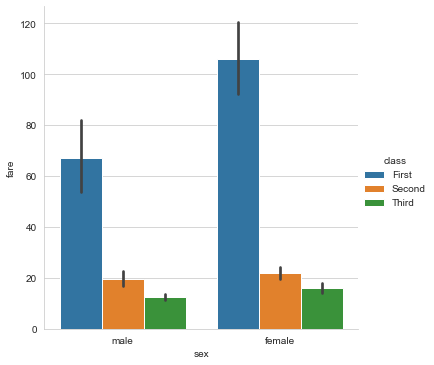

In [96]:
sns.catplot(x='sex', y='fare',
            hue='class', kind='bar',
            data=titanic)

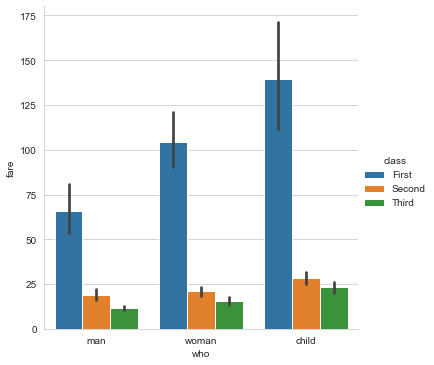

In [97]:
sns.catplot(x='who', y='fare',
            hue='class', kind='bar',
            data=titanic)

In [98]:
titanic.groupby(['class', 'sex'])['survived'].mean().unstack()

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [99]:
titanic.pivot_table('survived', index='class', columns='who')

who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


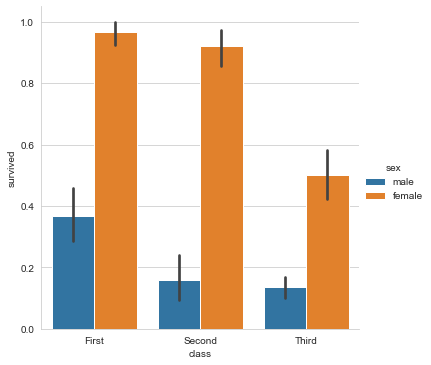

In [100]:
sns.catplot(x='class', y='survived',
            hue='sex', kind='bar',
            data=titanic);

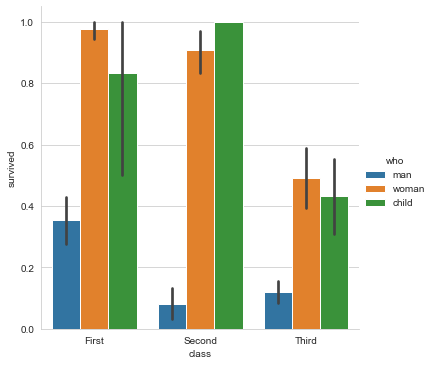

In [101]:
sns.catplot(x='class', y='survived',
            hue='who', kind='bar',
            data=titanic);

In [102]:
age = pd.cut(titanic['age'], [0, 18, 40, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

In [103]:
age = pd.cut(titanic['age'], [0, 18, 40, 80])
titanic.pivot_table('survived', ['who', age], 'class')

class              First    Second     Third
who   age                                   
child (0, 18]   0.833333  1.000000  0.431034
man   (0, 18]   0.500000  0.000000  0.086957
      (18, 40]  0.478261  0.063492  0.146199
      (40, 80]  0.280000  0.095238  0.064516
woman (0, 18]   1.000000  1.000000  0.461538
      (18, 40]  0.979167  0.914894  0.480000
      (40, 80]  0.961538  0.846154  0.111111

In [104]:
fare = pd.qcut(titanic['fare'], 3)
titanic.pivot_table('survived', ['who', age], [fare, 'class'])

fare           (-0.001, 8.662]           (8.662, 26.0]                      \
class                    First     Third         First    Second     Third   
who   age                                                                    
child (0, 18]              NaN  0.666667           NaN  1.000000  0.703704   
man   (0, 18]              NaN  0.125000           NaN  0.000000  0.000000   
      (18, 40]             0.0  0.138462           NaN  0.078431  0.114286   
      (40, 80]             NaN  0.074074           0.0  0.111111  0.000000   
woman (0, 18]              NaN  0.666667           NaN  1.000000  0.333333   
      (18, 40]             NaN  0.550000           NaN  0.894737  0.461538   
      (40, 80]             NaN  0.000000           1.0  0.818182  0.250000   

fare           (26.0, 512.329]               
class                    First Second Third  
who   age                                    
child (0, 18]         0.833333    1.0  0.08  
man   (0, 18]         0.500000    0.0  0.00  
      (18, 40]        0.523810    0.0  0.50  
      (40, 80]        0.291667    0.0   NaN  
woman (0, 18]         1.000000    NaN  0.00  
      (18, 40]        0.979167    1.0  0.25  
      (40, 80]        0.958333    1.0  0.00

In [105]:
titanic.pivot_table('survived', index='who', columns='class', margins=True)

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


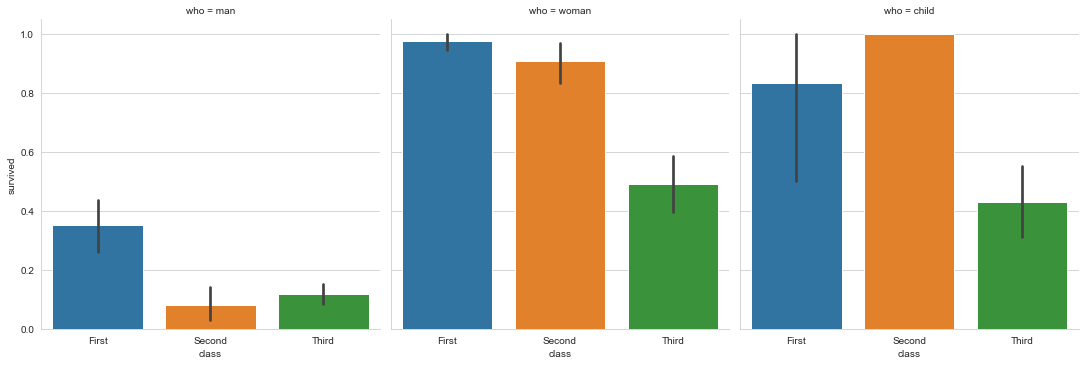

In [106]:
sns.catplot(x='class', y='survived',
            col='who', kind='bar',
            data=titanic);

In [107]:
titanic.pivot_table('survived', index='deck', columns='class', margins=True)

class,First,Second,Third,All
deck,,,,
A,0.466667,NaN,NaN,0.466667
B,0.744681,NaN,NaN,0.744681
C,0.593220,NaN,NaN,0.593220
D,0.758621,0.7500,NaN,0.757576
E,0.720000,0.7500,1.0,0.750000
F,NaN,0.8750,0.2,0.615385
G,NaN,NaN,0.5,0.500000
All,0.668571,0.8125,0.5,0.669951


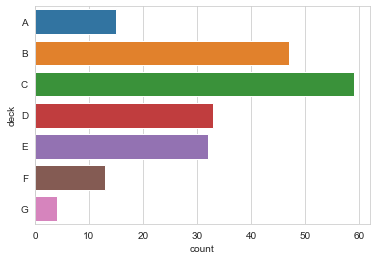

In [108]:
sns.countplot(y='deck', data=titanic);

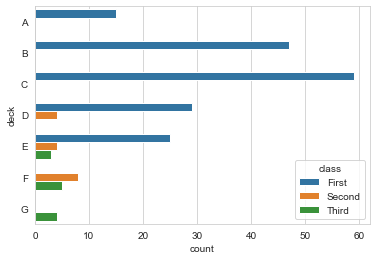

In [109]:
sns.countplot(y='deck', hue='class', data=titanic);

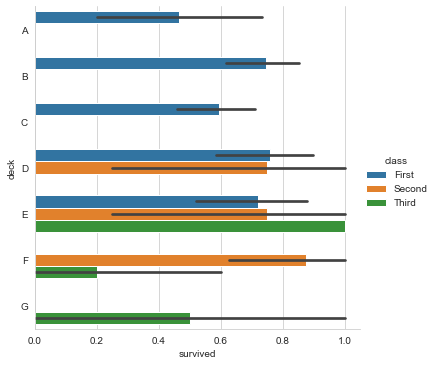

In [110]:
sns.catplot(x='survived', y='deck',
            hue='class', kind='bar',
            data=titanic);

In [111]:
titanic.pivot_table('survived', index='embark_town', columns='class', margins=True)

class,First,Second,Third,All
embark_town,,,,
Cherbourg,0.694118,0.529412,0.378788,0.553571
Queenstown,0.500000,0.666667,0.375000,0.389610
Southampton,0.582677,0.463415,0.189802,0.336957
All,0.626168,0.472826,0.242363,0.382452


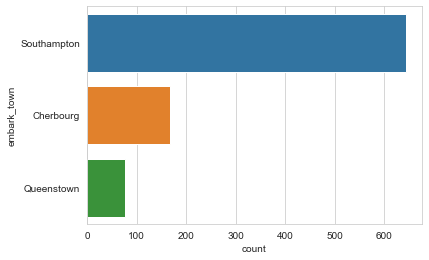

In [112]:
sns.countplot(y='embark_town', data=titanic);

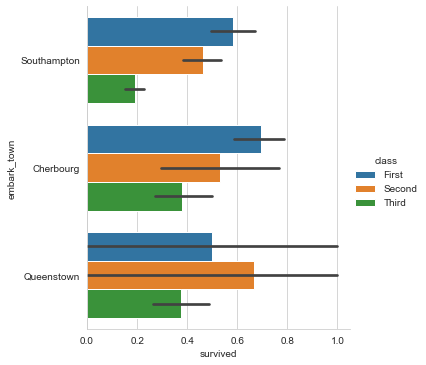

In [113]:
sns.catplot(x='survived', y='embark_town', hue='class', kind='bar', data=titanic);

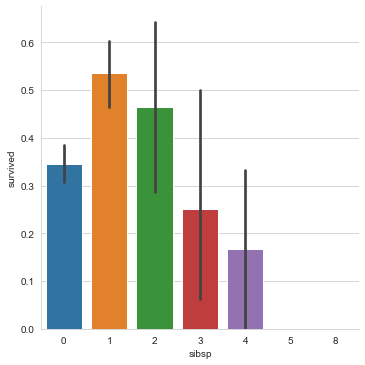

In [114]:
sns.catplot(x='sibsp', y='survived',
            kind='bar', data=titanic);

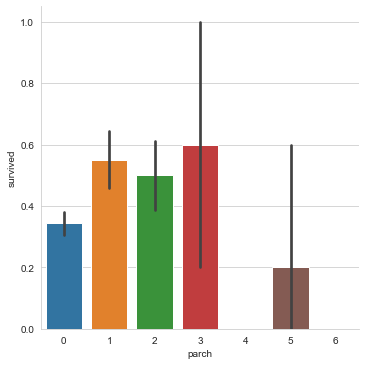

In [115]:
sns.catplot(x='parch', y='survived',
            kind='bar', data=titanic);

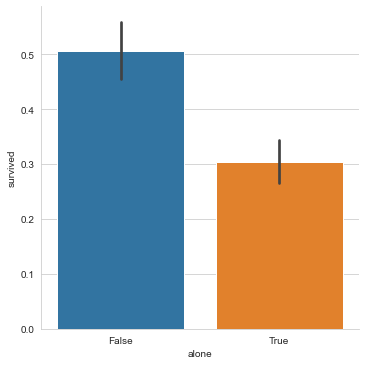

In [116]:
sns.catplot(x='alone', y='survived',
            kind='bar', data=titanic);